In [1]:
import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer

In [2]:
# Read the training data (csv file)
training_data = pd.read_csv('train.csv')

training_data.head(10)

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8,NaN,75751,0.2254,11,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.965681,1564384.957101
1,2,NaN,NaN,NaN,NaN,3,0.388896,17369,0.0166,13,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349065,2167437.936331
2,3,NaN,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383151,1911496.728938
3,4,NaN,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.423695,2139461.779618
4,5,6,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.264754,1584087.830943
5,6,NaN,NaN,-0.680515,NaN,1,0.227034,24099,0.2064,8,...,0.000242,0.001412,0.001880,-9.458593e-04,0.000471,0.001193,0.031098,-0.006551,1431110.003970,1788887.504962
6,7,NaN,-0.230636,-0.227021,-0.084126,7,-0.095007,39351,0.3650,13,...,0.000326,-0.000408,0.000086,-1.192267e-05,-0.000006,0.000640,-0.011105,-0.030745,1719166.004017,2148957.505022
7,8,NaN,2.582955,0.157344,0.617261,8,-0.177333,92214,0.2119,8,...,-0.000247,-0.000250,0.000010,1.620296e-05,0.000245,0.000006,0.020268,-0.059093,1349916.956503,1687396.195629
8,9,NaN,-0.187950,-0.259820,0.047637,8,-0.381621,18418,0.3583,8,...,0.000008,-0.000017,-0.000007,-3.834451e-04,-0.000929,0.000184,-0.009348,-0.024755,1536679.575577,1920849.469471
9,10,NaN,2.883570,0.813783,0.796746,7,0.021982,47637,0.2654,6,...,-0.002510,0.000640,0.000623,6.077426e-04,-0.001252,-0.000597,0.022407,-0.010674,1370803.713492,1713504.641865


In [180]:
(training_data.dropna(axis = 0, how = 'any')).shape

(929, 211)

In [3]:
Features = training_data.ix[:, 1:26]

In [4]:
(Features.ix[:, 0:15]).describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
count,6687.000000,30854.000000,38763.000000,32279.000000,40000.000000,38067.000000,40000.000000,39531.000000,38125.000000,20529.000000,39013.000000,38904.000000,39406.000000,39272.000000,37859.000000
mean,3.590250,-0.117558,0.558392,0.405572,5.482775,0.430972,49244.971525,0.196958,10.680289,4.744703,-0.572244,0.498508,4.238162,1.588524,3.891381
std,2.798532,1.236250,0.902233,0.799082,2.942324,1.498274,28242.409717,0.138485,2.850634,0.865096,1.246347,0.351855,2.570493,0.316907,5.035073
min,1.000000,-3.440521,-4.643526,-5.440596,1.000000,-0.936644,338.000000,0.009800,0.000000,1.000000,-7.359120,0.000000,0.000000,-0.149272,0.021679
25%,1.000000,-0.967186,-0.110192,-0.111696,2.000000,-0.265555,26143.000000,0.016600,9.000000,5.000000,-1.115527,0.140000,2.000000,1.415236,0.340081
50%,3.000000,-0.389162,0.437228,0.403516,6.000000,0.055564,48457.000000,0.213800,11.000000,5.000000,-0.324923,0.500000,4.000000,1.611754,1.292008
75%,6.000000,0.414442,1.064754,0.945944,8.000000,0.559921,72387.000000,0.331800,12.000000,5.000000,0.323631,0.850000,6.000000,1.782934,6.357561
max,10.000000,4.175150,4.530405,2.953163,10.000000,12.609885,99861.000000,0.365000,36.000000,6.000000,1.786886,1.000000,9.000000,3.161848,28.018114


In [5]:
(Features.ix[:, 15:25]).describe()

,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
count,39390.000000,39354.000000,39432.000000,38810.000000,32174.000000,38982.000000,38655.000000,38289.000000,39274.000000,39345.000000
mean,1.007362,-0.549725,0.803059,-1.205438,5.267359,0.605593,-0.773089,0.799833,-1.209290,-0.329675
std,0.085488,0.936833,1.165442,0.642426,2.549227,1.319158,1.389229,1.288040,1.739656,0.958661
min,1.000000,-2.613987,-5.758047,-3.292909,2.000000,-1.514998,-5.819912,-7.221387,-11.442205,-1.903876
25%,1.000000,-1.021216,0.057598,-1.619718,3.000000,-0.294925,-1.787615,0.539979,-1.838688,-0.830749
50%,1.000000,-0.599050,0.587005,-1.169327,5.000000,0.308468,-0.699112,0.962580,-0.868435,-0.551550
75%,1.000000,-0.184854,1.321231,-0.735786,7.000000,1.109743,0.282958,1.415303,-0.129465,-0.257543
max,2.000000,7.683857,6.352352,0.898236,10.000000,7.737020,2.284991,3.228906,2.526654,4.020332



The data is 40000*211.  There are only complete row.  So the missing value imputation step is necessary:

1. All the return and weight data are complete.

2. In feature data, Feature 1 has a high missing rate (83.3%).  For now, we can do median imputation on it (later can also try to delete it, may not affect much)

3. Count data: Feature 7(large range)
   Categorical data: Feature 1, 5, 9, 10, 13, 16, 20 (for now, we can't tell whether is nominal or ordinal; treat them as ordinal first)
   Others are numerical


Two ways we can consider to impute missing data: 1 - impute with median, mode; 2 - impute with 0

Which method to use ? Visualize the distributions of features.

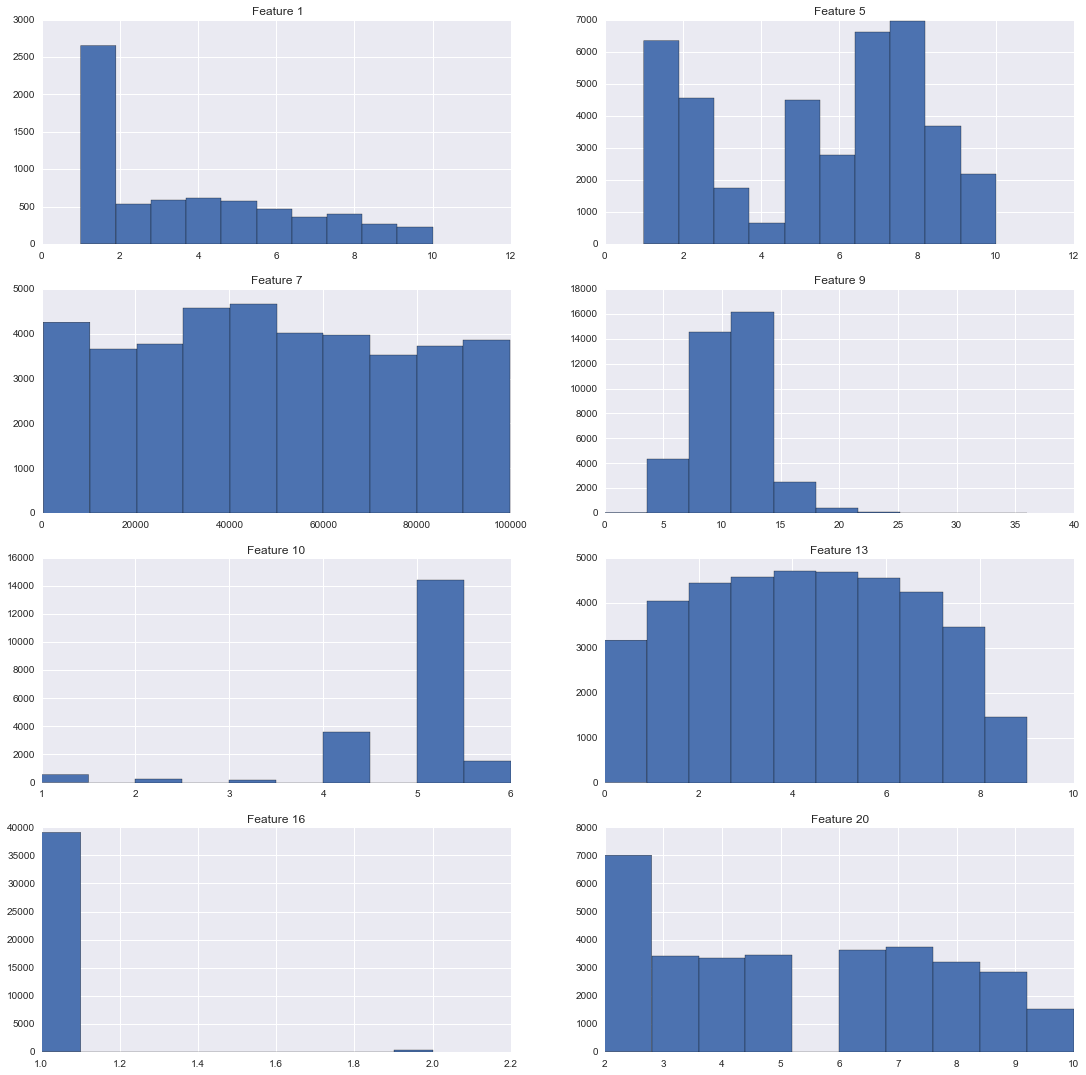

In [184]:
# See the barplots of Feature 1, 5, 7, 9, 10, 13, 16, 20

fig, axes = plt.subplots(nrows = 4, ncols = 2)

fig.set_size_inches(18.5, 18.5)

Features.ix[:, 0].hist(ax = axes[0,0]); axes[0,0].set_title('Feature 1')
Features.ix[:, 4].hist(ax = axes[0,1]); axes[0,1].set_title('Feature 5')
Features.ix[:, 6].hist(ax = axes[1,0]); axes[1,0].set_title('Feature 7')
Features.ix[:, 8].hist(ax = axes[1,1]); axes[1,1].set_title('Feature 9')
Features.ix[:, 9].hist(ax = axes[2,0]); axes[2,0].set_title('Feature 10')
Features.ix[:, 12].hist(ax = axes[2,1]); axes[2,1].set_title('Feature 13')
Features.ix[:, 15].hist(ax = axes[3,0]); axes[3,0].set_title('Feature 16')
Features.ix[:, 19].hist(ax = axes[3,1]); axes[3,1].set_title('Feature 20')



In [188]:
# Keep the orginal unimputed version (for tree methods), and the imputed version
# Use sklearn.preprocessing.Imputer to do Naive imputation

Discrete_Features = Features.ix[:, [0, 4, 8, 9, 12, 15, 19]]
Numeric_Features = Features.ix[:, [1,2,3,5,6,7,10,11,13,14,16,17,18] + range(20, 25, 1)]

imp = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0, copy = True)
imp.fit(Numeric_Features)
Numeric_Imputed = imp.transform(Numeric_Features)

Numeric_Imputed = pd.DataFrame(Numeric_Imputed, columns = [2,3,4,6,7,8,11,12,14,15,17,18,19] + range(21, 26, 1))


imp2 = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0, copy = True)
imp2.fit(Discrete_Features)
Discrete_Imputed = imp2.transform(Discrete_Features)

Discrete_Imputed = pd.DataFrame(Discrete_Imputed, columns = [1, 5, 9, 10, 13, 16, 20])

In [191]:
Discrete_Imputed.describe()

,1,5,9,10,13,16,20
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.433025,5.482775,10.648400,4.868975,4.234625,1.007250,4.628100
std,1.497755,2.942324,2.786731,0.632746,2.551497,0.084839,2.628148
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
25%,1.000000,2.000000,9.000000,5.000000,2.000000,1.000000,2.000000
50%,1.000000,6.000000,10.000000,5.000000,4.000000,1.000000,4.000000
75%,1.000000,8.000000,12.000000,5.000000,6.000000,1.000000,7.000000
max,10.000000,10.000000,36.000000,6.000000,9.000000,2.000000,10.000000


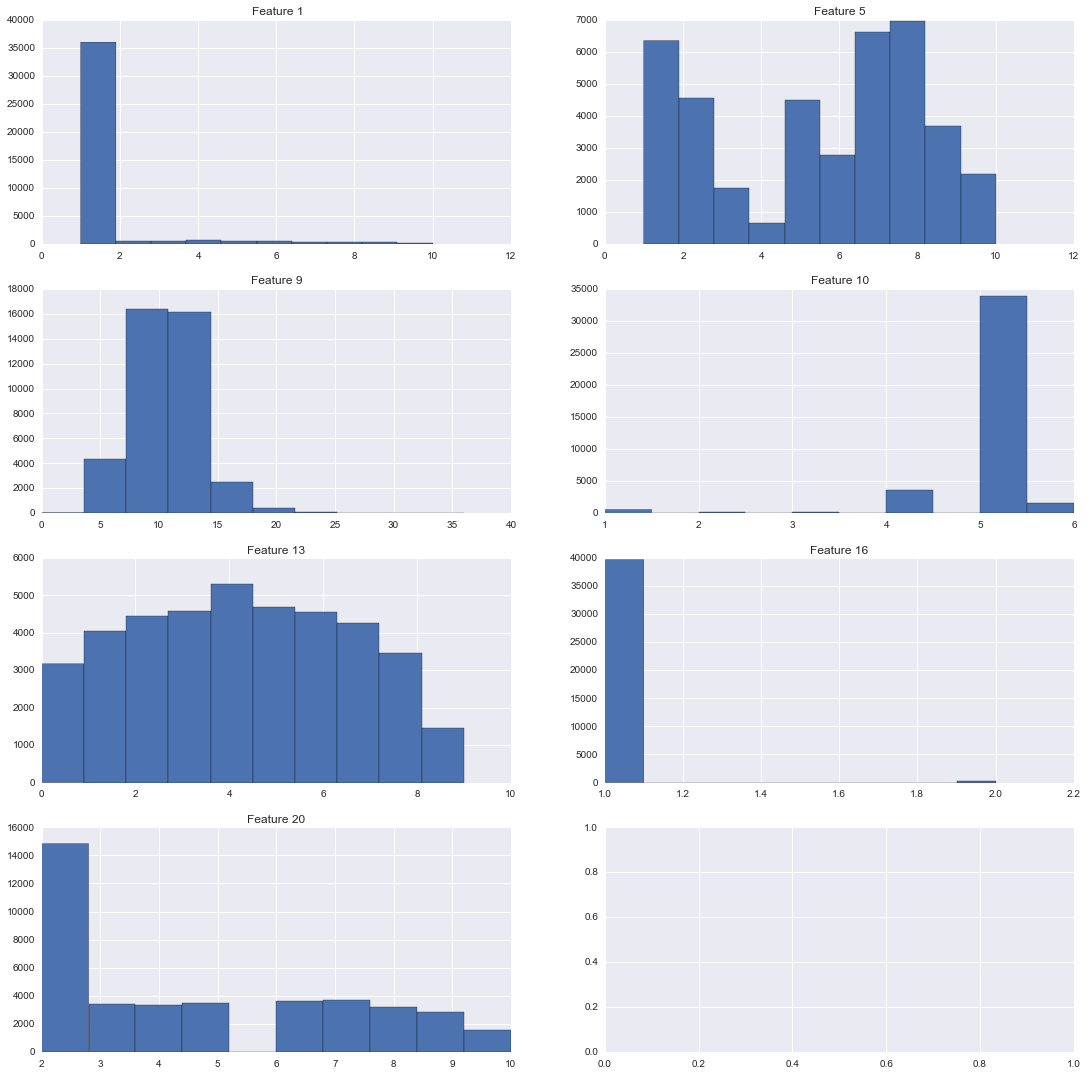

In [195]:
# See the barplots of Feature 1, 5, 9, 10, 13, 16, 20

fig, axes = plt.subplots(nrows = 4, ncols = 2)

fig.set_size_inches(18.5, 18.5)

Discrete_Imputed[1].hist(ax = axes[0,0]); axes[0,0].set_title('Feature 1')
Discrete_Imputed[5].hist(ax = axes[0,1]); axes[0,1].set_title('Feature 5')
Discrete_Imputed[9].hist(ax = axes[1,0]); axes[1,0].set_title('Feature 9')
Discrete_Imputed[10].hist(ax = axes[1,1]); axes[1,1].set_title('Feature 10')
Discrete_Imputed[13].hist(ax = axes[2,0]); axes[2,0].set_title('Feature 13')
Discrete_Imputed[16].hist(ax = axes[2,1]); axes[2,1].set_title('Feature 16')
Discrete_Imputed[20].hist(ax = axes[3,0]); axes[3,0].set_title('Feature 20')

In [197]:
# Put imputed features back into original order
# Name as capital "Train"
# Save into "Train_Imp.csv"

Train = pd.concat([Discrete_Imputed, Numeric_Imputed], axis = 1)
Train = Train[range(1, 26, 1)]


Id  = pd.DataFrame(range(1, 40001, 1), columns = ['id'])

Train = pd.concat([Id, Train, training_data.ix[:, 26:221]], axis = 1)

In [198]:
Train.to_csv(path_or_buf = 'Train_Imp.csv')

In [199]:
peep = pd.read_csv('Train_Imp.csv', index_col = 0)
peep.head(10)

,id,1,2,3,4,5,6,7,8,9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,1,-0.389162,0.437228,0.403516,8,0.055564,75751,0.2254,11,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.96568,1564384.95710
1,2,1,-0.389162,0.437228,0.403516,3,0.388896,17369,0.0166,13,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.34906,2167437.93633
2,3,1,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1529197.38315,1911496.72894
3,4,1,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.42369,2139461.77962
4,5,6,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.26475,1584087.83094
5,6,1,-0.389162,-0.680515,0.403516,1,0.227034,24099,0.2064,8,...,0.000242,0.001412,0.001880,-9.458593e-04,0.000471,0.001193,0.031098,-0.006551,1431110.00397,1788887.50496
6,7,1,-0.230636,-0.227021,-0.084126,7,-0.095007,39351,0.3650,13,...,0.000326,-0.000408,0.000086,-1.192267e-05,-0.000006,0.000640,-0.011105,-0.030745,1719166.00402,2148957.50502
7,8,1,2.582955,0.157344,0.617261,8,-0.177333,92214,0.2119,8,...,-0.000247,-0.000250,0.000010,1.620296e-05,0.000245,0.000006,0.020268,-0.059093,1349916.95650,1687396.19563
8,9,1,-0.187950,-0.259820,0.047637,8,-0.381621,18418,0.3583,8,...,0.000008,-0.000017,-0.000007,-3.834451e-04,-0.000929,0.000184,-0.009348,-0.024755,1536679.57558,1920849.46947
9,10,1,2.883570,0.813783,0.796746,7,0.021982,47637,0.2654,6,...,-0.002510,0.000640,0.000623,6.077426e-04,-0.001252,-0.000597,0.022407,-0.010674,1370803.71349,1713504.64186


In [200]:
training_data.head(10)

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8,NaN,75751,0.2254,11,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.965681,1564384.957101
1,2,NaN,NaN,NaN,NaN,3,0.388896,17369,0.0166,13,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349065,2167437.936331
2,3,NaN,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383151,1911496.728938
3,4,NaN,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.423695,2139461.779618
4,5,6,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.264754,1584087.830943
5,6,NaN,NaN,-0.680515,NaN,1,0.227034,24099,0.2064,8,...,0.000242,0.001412,0.001880,-9.458593e-04,0.000471,0.001193,0.031098,-0.006551,1431110.003970,1788887.504962
6,7,NaN,-0.230636,-0.227021,-0.084126,7,-0.095007,39351,0.3650,13,...,0.000326,-0.000408,0.000086,-1.192267e-05,-0.000006,0.000640,-0.011105,-0.030745,1719166.004017,2148957.505022
7,8,NaN,2.582955,0.157344,0.617261,8,-0.177333,92214,0.2119,8,...,-0.000247,-0.000250,0.000010,1.620296e-05,0.000245,0.000006,0.020268,-0.059093,1349916.956503,1687396.195629
8,9,NaN,-0.187950,-0.259820,0.047637,8,-0.381621,18418,0.3583,8,...,0.000008,-0.000017,-0.000007,-3.834451e-04,-0.000929,0.000184,-0.009348,-0.024755,1536679.575577,1920849.469471
9,10,NaN,2.883570,0.813783,0.796746,7,0.021982,47637,0.2654,6,...,-0.002510,0.000640,0.000623,6.077426e-04,-0.001252,-0.000597,0.022407,-0.010674,1370803.713492,1713504.641865


In [6]:
# Now see the distribution of all features

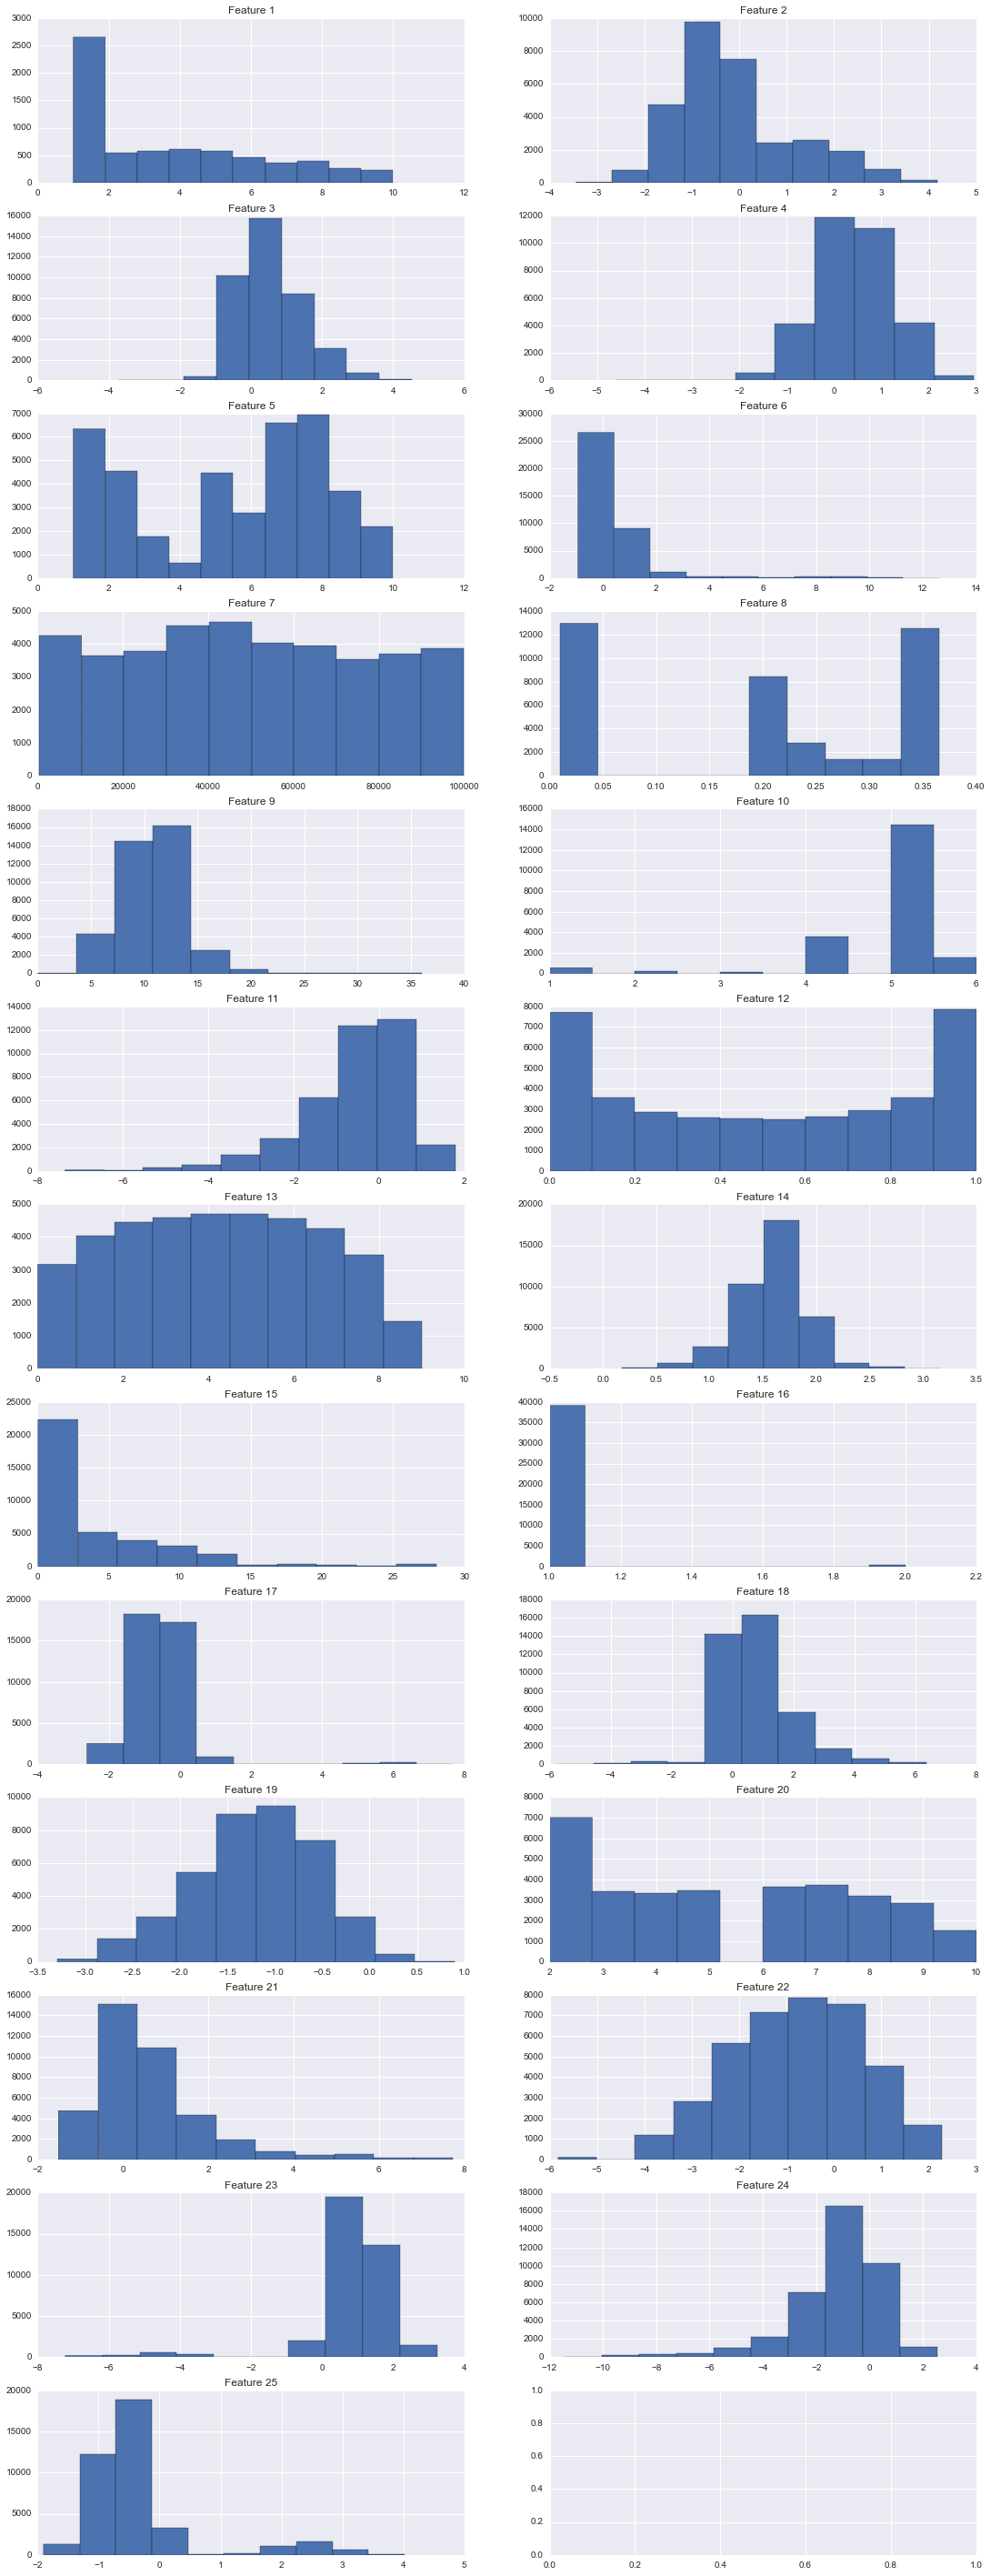

In [8]:
# See the barplots of Feature 1, 5, 7, 9, 10, 13, 16, 20

fig, axes = plt.subplots(nrows = 13, ncols = 2)

fig.set_size_inches(18.5, 50)

Features.ix[:, 0].hist(ax = axes[0,0]); axes[0,0].set_title('Feature 1')
Features.ix[:, 1].hist(ax = axes[0,1]); axes[0,1].set_title('Feature 2')
Features.ix[:, 2].hist(ax = axes[1,0]); axes[1,0].set_title('Feature 3')
Features.ix[:, 3].hist(ax = axes[1,1]); axes[1,1].set_title('Feature 4')
Features.ix[:, 4].hist(ax = axes[2,0]); axes[2,0].set_title('Feature 5')
Features.ix[:, 5].hist(ax = axes[2,1]); axes[2,1].set_title('Feature 6')
Features.ix[:, 6].hist(ax = axes[3,0]); axes[3,0].set_title('Feature 7')
Features.ix[:, 7].hist(ax = axes[3,1]); axes[3,1].set_title('Feature 8')
Features.ix[:, 8].hist(ax = axes[4,0]); axes[4,0].set_title('Feature 9')
Features.ix[:, 9].hist(ax = axes[4,1]); axes[4,1].set_title('Feature 10')
Features.ix[:, 10].hist(ax = axes[5,0]); axes[5,0].set_title('Feature 11')
Features.ix[:, 11].hist(ax = axes[5,1]); axes[5,1].set_title('Feature 12')
Features.ix[:, 12].hist(ax = axes[6,0]); axes[6,0].set_title('Feature 13')
Features.ix[:, 13].hist(ax = axes[6,1]); axes[6,1].set_title('Feature 14')
Features.ix[:, 14].hist(ax = axes[7,0]); axes[7,0].set_title('Feature 15')
Features.ix[:, 15].hist(ax = axes[7,1]); axes[7,1].set_title('Feature 16')
Features.ix[:, 16].hist(ax = axes[8,0]); axes[8,0].set_title('Feature 17')
Features.ix[:, 17].hist(ax = axes[8,1]); axes[8,1].set_title('Feature 18')
Features.ix[:, 18].hist(ax = axes[9,0]); axes[9,0].set_title('Feature 19')
Features.ix[:, 19].hist(ax = axes[9,1]); axes[9,1].set_title('Feature 20')
Features.ix[:, 20].hist(ax = axes[10,0]); axes[10,0].set_title('Feature 21')
Features.ix[:, 21].hist(ax = axes[10,1]); axes[10,1].set_title('Feature 22')
Features.ix[:, 22].hist(ax = axes[11,0]); axes[11,0].set_title('Feature 23')
Features.ix[:, 23].hist(ax = axes[11,1]); axes[11,1].set_title('Feature 24')
Features.ix[:, 24].hist(ax = axes[12,0]); axes[12,0].set_title('Feature 25')
